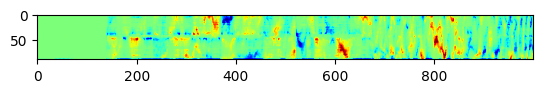

In [37]:
import cv2
import numpy as np
import jtmodel
import matplotlib.pyplot as plt
import importlib
importlib.reload(jtmodel)

flow = "someflow.png"

image = cv2.imread(flow, cv2.IMREAD_GRAYSCALE)
image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
# image = image[2000:3000]
image = jtmodel.stage1(image)

image_view = image.astype(np.int32)
image_view = ((image_view[:90] - image_view[90:]) / 2) + 128
image_view = image_view.astype(np.uint8)

plt.imshow(image_view, cmap='jet')
plt.show()


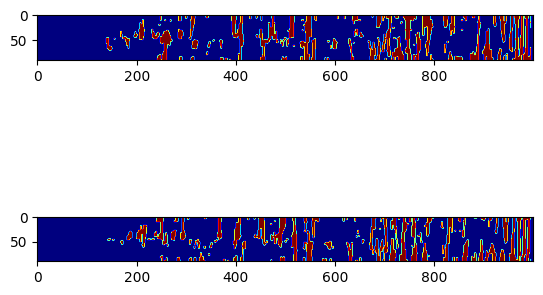

In [15]:
importlib.reload(jtmodel)

fig,ax = plt.subplots(2, 1)
image2 = jtmodel.stage2(image)

ax[0].imshow(image2[0], cmap='jet')
ax[1].imshow(image2[1], cmap='jet')

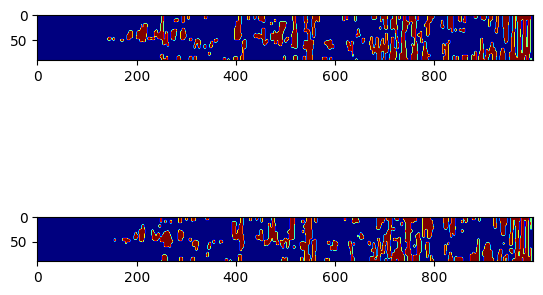

In [16]:
importlib.reload(jtmodel)

fig,ax = plt.subplots(2, 1)
image3 = jtmodel.stage3(image2)

ax[0].imshow(image3[0], cmap='jet')
ax[1].imshow(image3[1], cmap='jet')

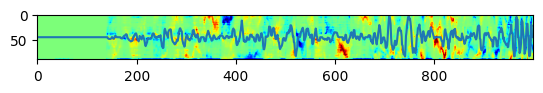

In [17]:
importlib.reload(jtmodel)

scores = jtmodel.stage4(image3)
plt.imshow(image_view, cmap='jet')
plt.plot(scores + 45)

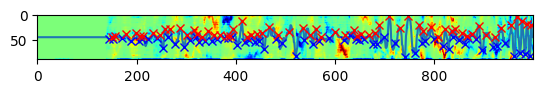

In [13]:
importlib.reload(jtmodel)

plt.imshow(image_view, cmap='jet')
plt.plot(scores + 45)

beats = jtmodel.stage5(scores)
peaks = np.array([b for b in beats if b[2] == 1])
valleys = np.array([b for b in beats if b[2] == -1])

plt.plot(peaks[:, 0], peaks[:, 1] + 45, 'x', color='blue', label='Up actions')
plt.plot(valleys[:, 0], valleys[:, 1] + 45, 'x', color='red', label='Down actions')

plt.show()

In [26]:
importlib.reload(jtmodel)

image = cv2.imread(flow, cv2.IMREAD_GRAYSCALE)
actions = jtmodel.process(image)
print(actions)

Detected 1843 actions
[[  262    90]
 [  275    10]
 [  279    90]
 ...
 [14591    90]
 [14600    10]
 [14607    90]]
